# Saint Brieuc: grande pêche et cabotage au milieu du 19e siècle

Données issues de :

Martine Cocaud et Jacques Cellier, _« Grande pèche et cabotage dans le quartier de Saint-Brieuc au milieu du XIXe siècle. Méthodes et outils pour l’analyse des circuits commerciaux à partir des rôles de désarmement »_, in: Des galères méditerranéennes aux rivages normands, 2011, pp. 283‑302. Cf. [cette base de données](http://jacquescellier.fr/histoire/bdhistoire/cabot/) et ces [explications](http://jacquescellier.fr/histoire/bdhistoire/cabot/cabotages.pdf).

Le fichier 'data/cabotage.sqlite' contient une extraction des données de la base en ligne.


et de :

Auffray Jean-Michel, « Entre grande pêche et commerce », Annales de Bretagne et des Pays de l’Ouest. Anjou. Maine. Poitou-Charente. Touraine 117 (4), 2010, pp. 165‑194. En ligne: <https://doi.org/10.4000/abpo.1846>.




Voir aussi:

Conan Joseph, _Lettres d’un capitaine terre-neuvas_, Rennes, Presses universitaires de Rennes, 2013 (Mémoire commune). En ligne: <http://books.openedition.org/pur/43904>, consulté le 10.12.2021.





In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sqlite3 as sql

In [26]:
import sys

In [2]:
file1 = 'data/auffray_2010_donnees_export.csv'

In [4]:
data1 = pd.read_csv(file1, sep='|')
data1.head()

,annee,saint_malo_terneuv,saint_brieuc_binic_terneuv,saint_brieuc_terneuv,binic_terneuv,saint_brieuc_commerce
0,1848,61.0,69.0,30.0,39.0,4.0
1,1849,61.0,70.0,31.0,39.0,4.0
2,1850,68.0,72.0,35.0,37.0,1.0
3,1851,72.0,71.0,32.0,39.0,3.0
4,1852,91.0,75.0,41.0,34.0,0.0


In [7]:
df = data1[data1['annee'].between(1848,1858, inclusive='both')]
df

,annee,saint_malo_terneuv,saint_brieuc_binic_terneuv,saint_brieuc_terneuv,binic_terneuv,saint_brieuc_commerce
0,1848,61.0,69.0,30.0,39.0,4.0
1,1849,61.0,70.0,31.0,39.0,4.0
2,1850,68.0,72.0,35.0,37.0,1.0
3,1851,72.0,71.0,32.0,39.0,3.0
4,1852,91.0,75.0,41.0,34.0,0.0
5,1853,85.0,71.0,37.0,34.0,5.0
6,1854,66.0,58.0,29.0,29.0,10.0
7,1855,65.0,51.0,26.0,25.0,10.0
8,1856,61.0,55.0,27.0,28.0,7.0
9,1857,70.0,69.0,32.0,37.0,3.0


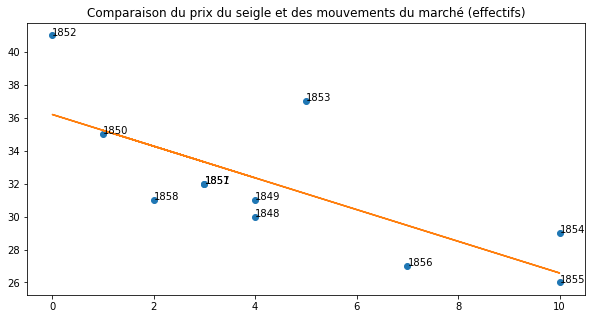

In [9]:
##
# https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python

x = np.array(df['saint_brieuc_commerce'])
y = np.array(df['saint_brieuc_terneuv'])

plt.rcParams["figure.figsize"] = [10, 5]

plt.plot(x, y, 'o')
plt.title("Comparaison du prix du seigle et des mouvements du marché (effectifs)")


# m = slope, b=intercept
m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x + b)

for i, label in enumerate(df['annee']):
    plt.annotate(label, (x[i], y[i]))
plt.show()

In [10]:
### Coéfficient de corrélation de Pearsons
# https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html
np.corrcoef([x,y])[1][0]

-0.7328149491028327

[]

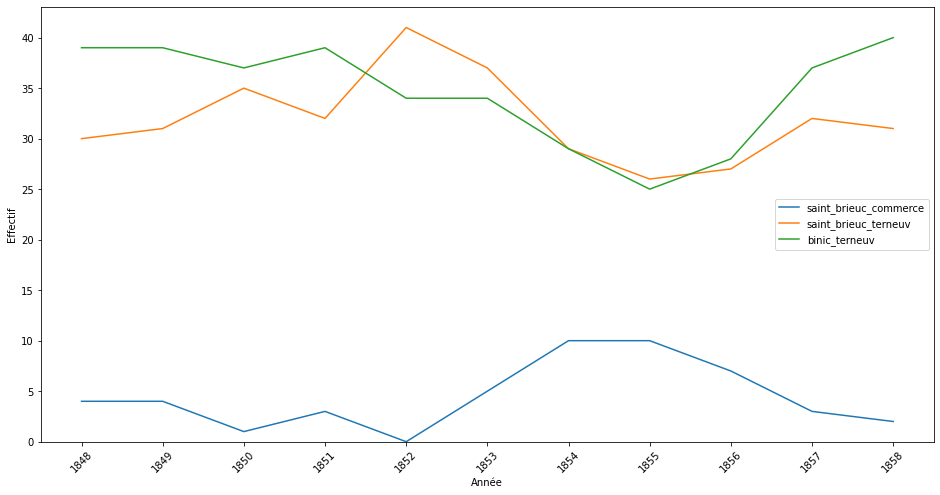

In [40]:
fig,ax = plt.subplots(figsize=(16,8))


for name in ['saint_brieuc_commerce','saint_brieuc_terneuv','binic_terneuv']:
    ax.plot(df[name],label=name)

idx = np.asarray([i for i in range(len(df['annee']))])
ax.set_xticks(idx)
ax.set_xticklabels(df['annee'], rotation=45)


ax.set_xlabel("Année")
ax.set_ylabel("Effectif")
ax.legend(loc='best')
ax.set_ylim(ymin=0)

plt.plot()